# ML (Loan_Prediction_Analysis)

## **Table of contents**

1. [Problem Statement](#Section1)<br>
<br> 
2. [Importing Pakages](#Section3)<br>
<br>
3. [Importing Dataset](#Section4)<br>
<br>
4. [Data Profiling](#Section5)<br>
<br>   
5. [Exploratory Data Analysis (EDA)](#Section4)<br>
<br>
6. [Prepare data for Machine Learning Modeling](#Section5)<br>  
<br>
7. [Machine Learning Algorithms](#Section6)<br>
<br>
8. [Save the model for Prediction](#Section7)<br>
<br>
10. [Comparing all the results](#Section7)<br>
<br>
11. [Conclusion](#Section8)



## **1. Problem statement**

<font color=red>
    
The goal of this project is to build a machine learning model that can predict whether a loan applicant is likely to be a credit risk or not. The model should take various features related to the applicant's personal, financial, and employment information as inputs and output a binary classification (e.g., "Approved" or "Not Approved") represent the loan's likelihood of approval.
</font>



## **2. Importing Pakages**

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## **3. Importing Dataset**

In [4]:
data = pd.read_csv(r"C:\Users\VCs\Music\Capstone_Project 2023\FINAL_PROJECT\Copy of loan (2) - Copy.csv")

## **4. Data Profiling**

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
data.tail()

Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N

In [8]:
data.shape

(614, 13)

### 4.1 Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [9]:
print("Number of Rows =",data.shape[0])
print("Number of Columns =",data.shape[1])

Number of Rows = 614
Number of Columns = 13


In [10]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### 4.2 Statistic  of dataset

In [11]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

### 4.3 Find name Columns in dataset

In [12]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 4.4  Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
pip install ipywidgets


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: c:\users\vcs\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [15]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.5 To Check Null Values In The Dataset

In [16]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### 4.6 To Handling The missing Values

In [18]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [19]:
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)

In [20]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [21]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [22]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [23]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [24]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [25]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### To check duplicates values

In [26]:
data.duplicated().sum()

0

## **5.Exploratory Data Analysis (EDA)**

In [27]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "Loan_Status"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = Y, 1 = N)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

#### 5.8 To Column featuring

In [28]:
data['Total_income']=data['ApplicantIncome']+data['CoapplicantIncome']

<AxesSubplot:>

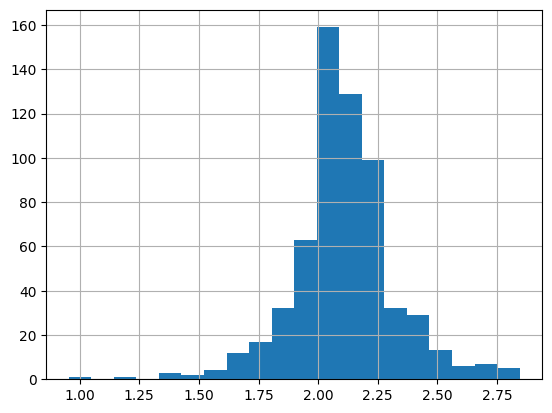

In [29]:
data['loan_amount_log']=np.log10(data['LoanAmount'])
data['loan_amount_log'].hist(bins=20)

In [30]:
data.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       120.0             360.0   
1             4583             1508.0       128.0             360.0   

   Credit_History Property_Area Loan_Status  Total_income  loan_amount_log  
0             1.0         Urban           Y        5849.0         2.079181  
1             1.0         Rural           N        6091.0         2.107210

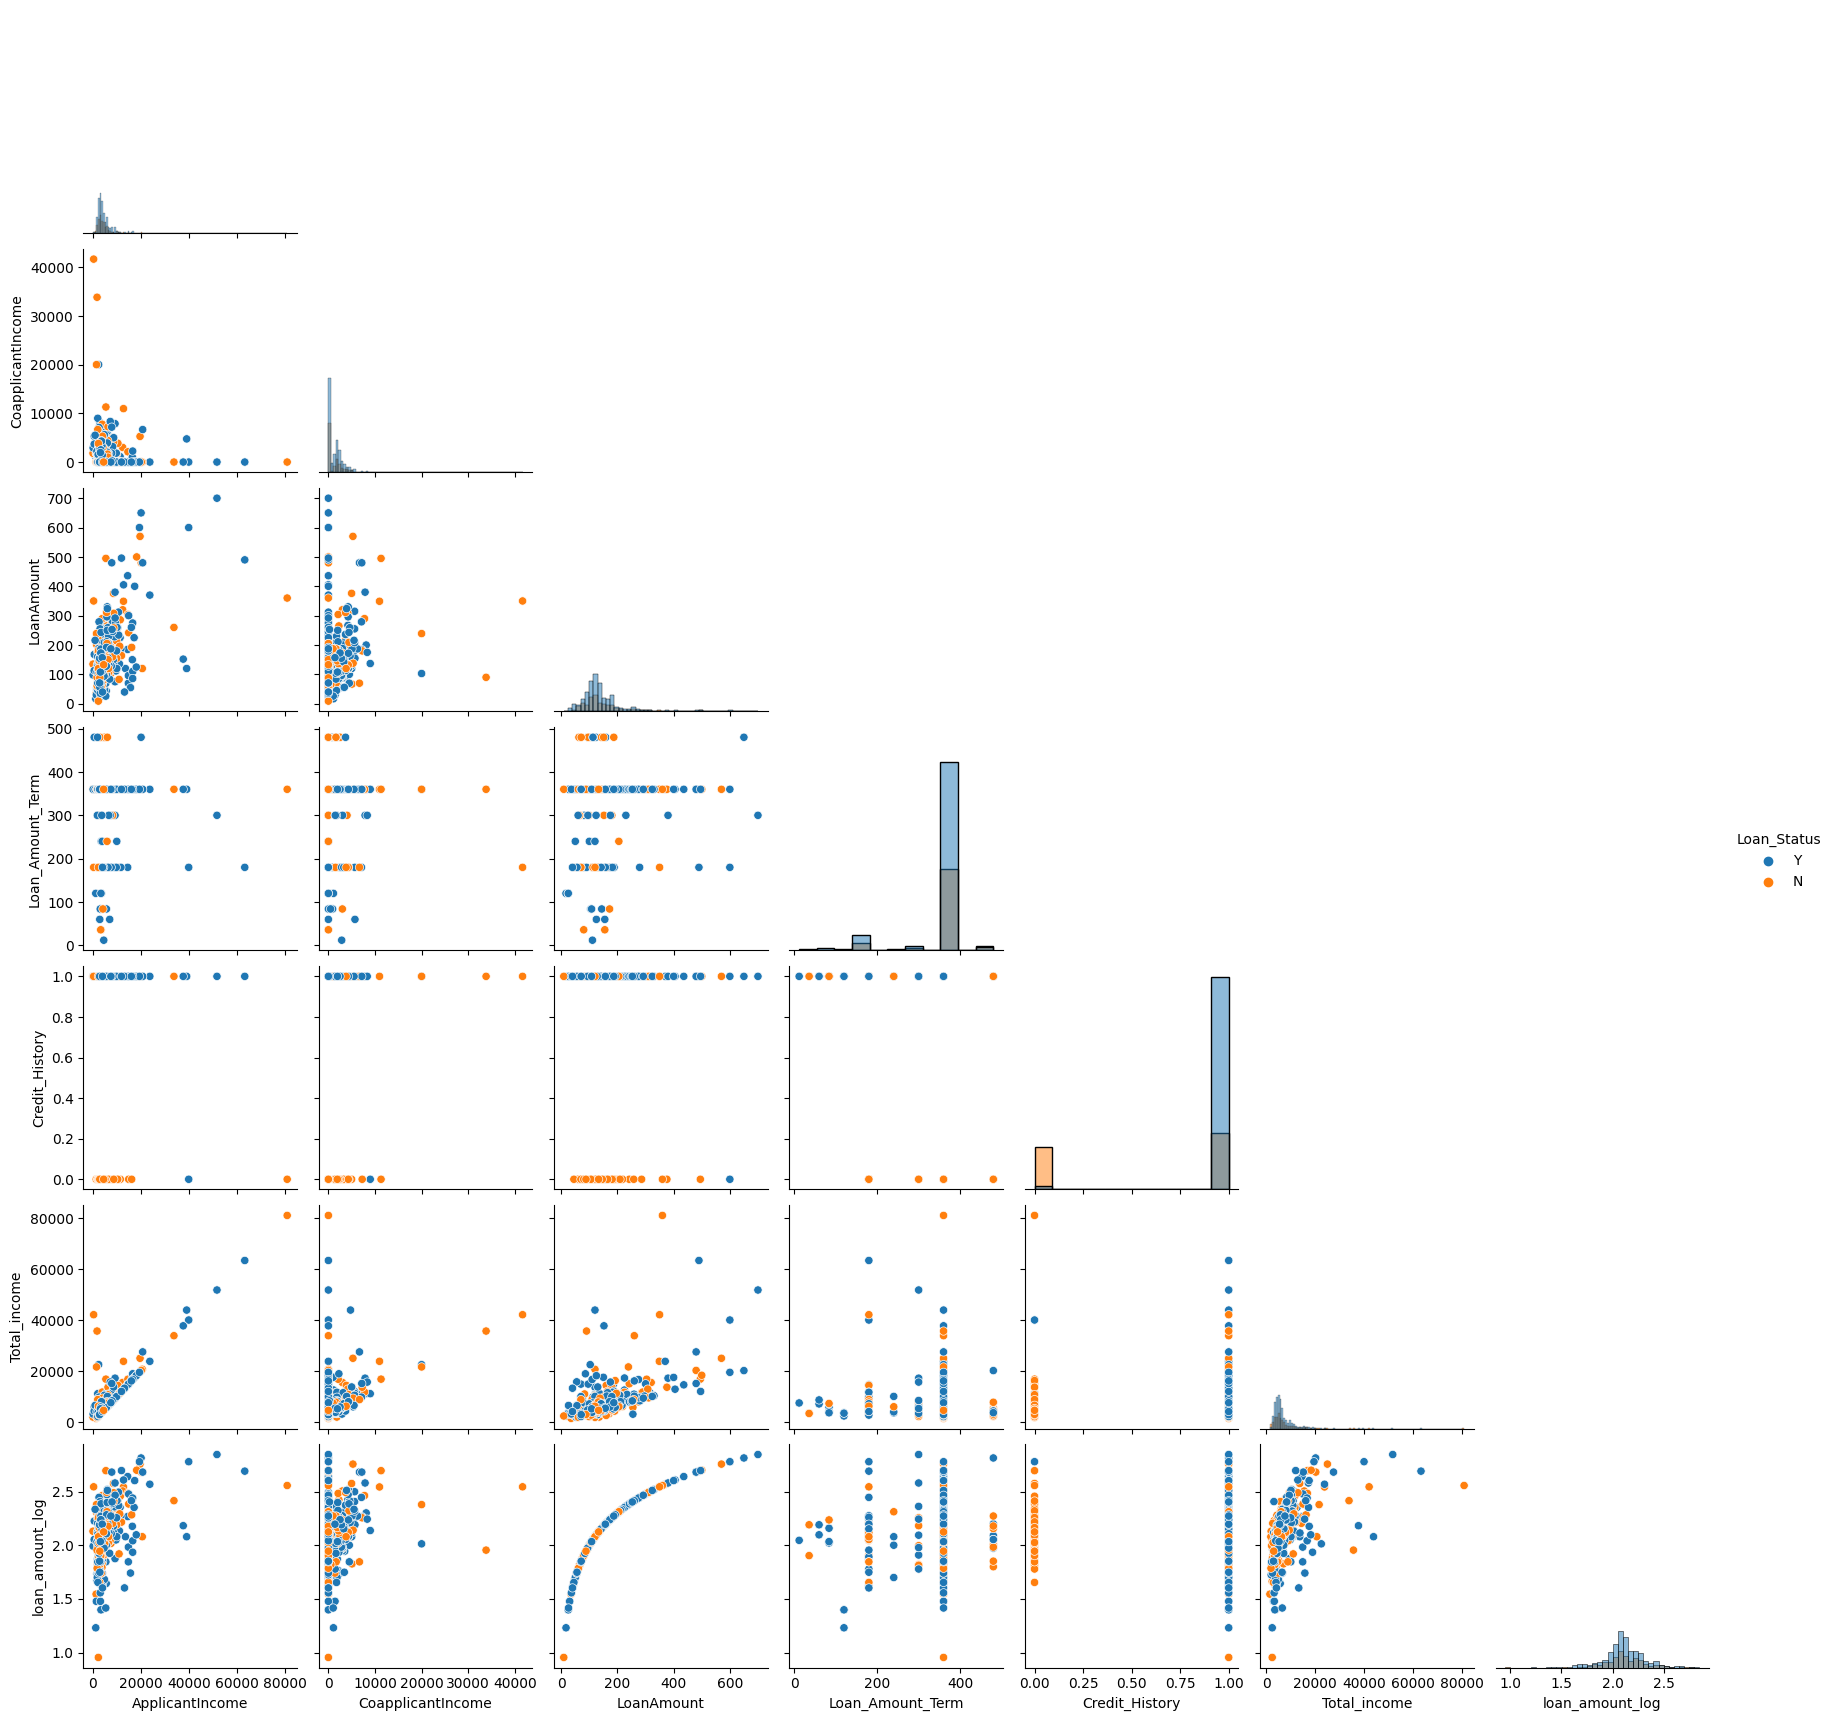

In [31]:
sns.pairplot(data=data,corner=True,hue="Loan_Status",diag_kind="hist")
plt.style.use("Solarize_Light2")

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

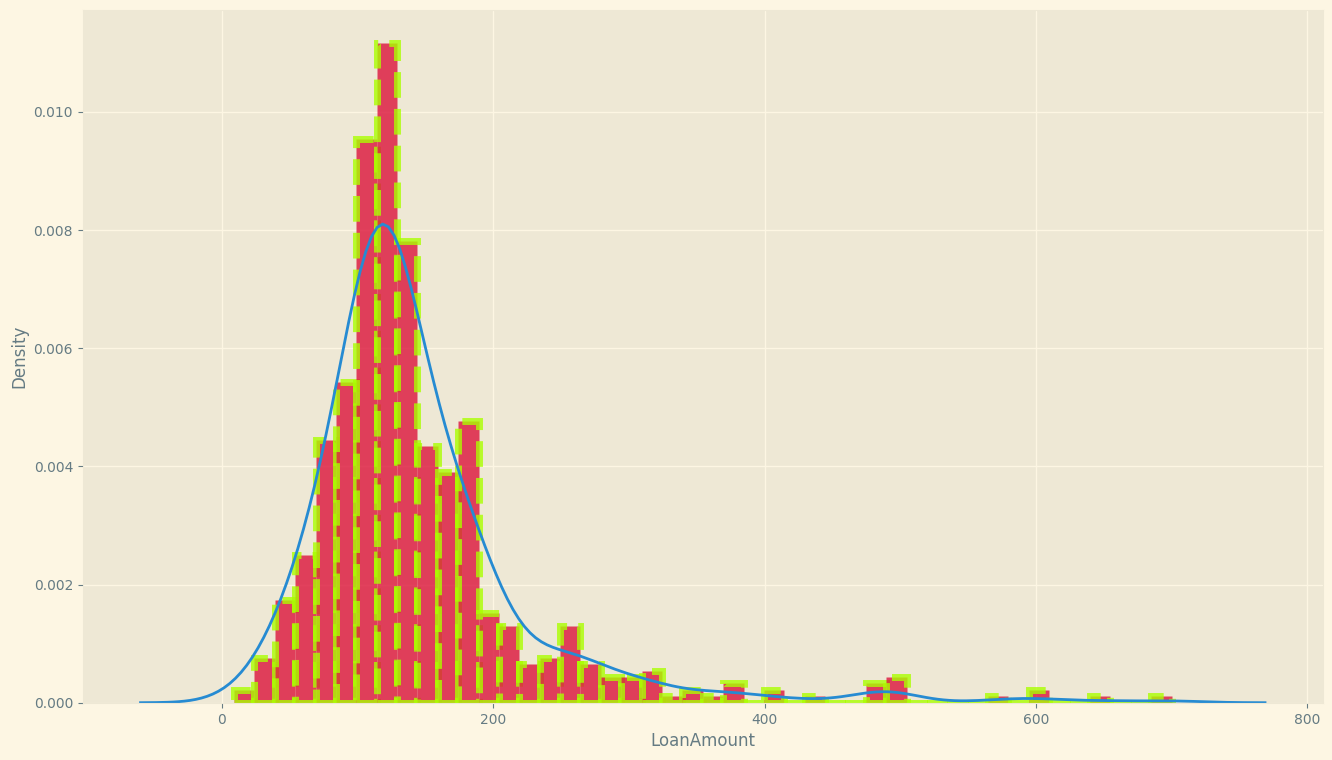

In [32]:
plt.figure(figsize=(16,9))
 
# hist keyword argument to change hist format
sns.distplot(data["LoanAmount"],
            hist_kws = {'color':'#DC143C', 'edgecolor':'#aaff00',
                       'linewidth':5, 'linestyle':'--', 'alpha':0.8}) # hist keyword parameter to change hist format


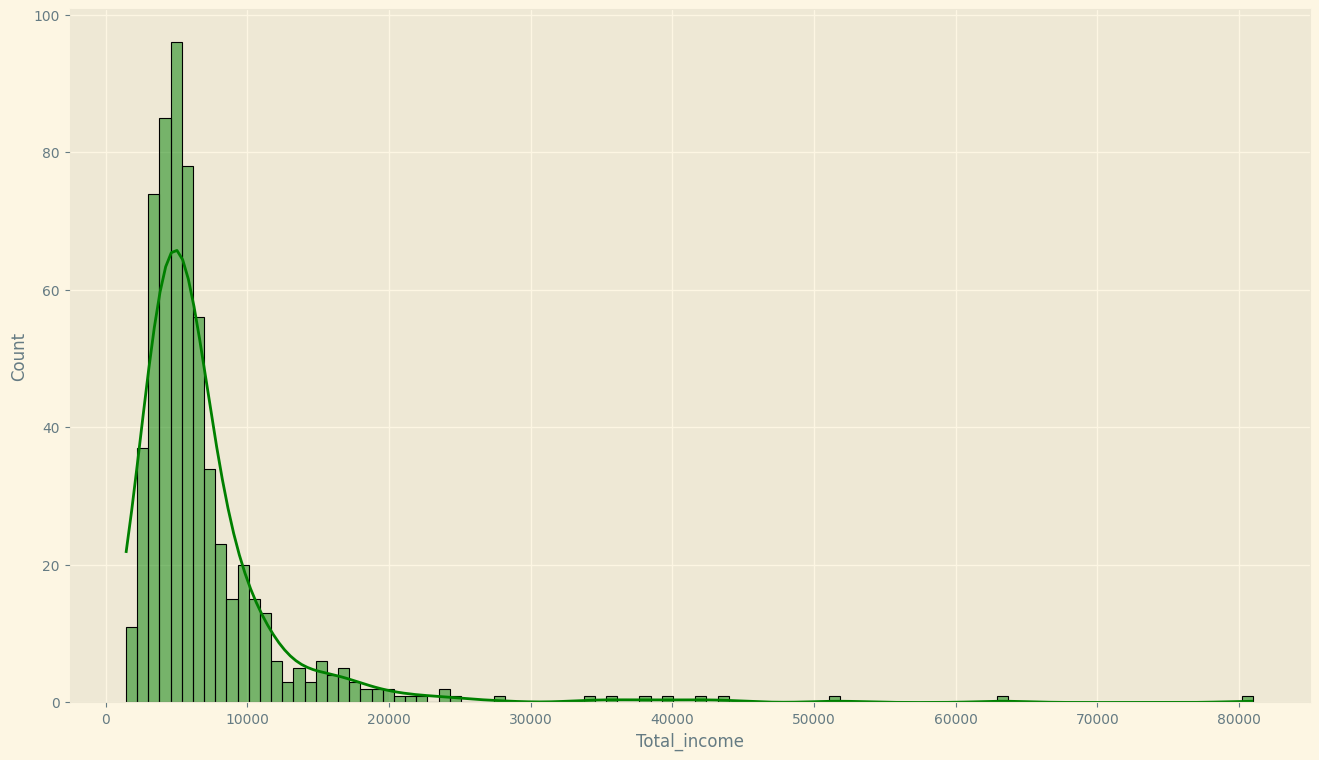

In [33]:
plt.figure(figsize=(16,9))
sns.histplot(data=data,x='Total_income',kde=True,cbar=True,color="green",legend=True,)
plt.style.use('dark_background')

<Figure size 1000x900 with 0 Axes>

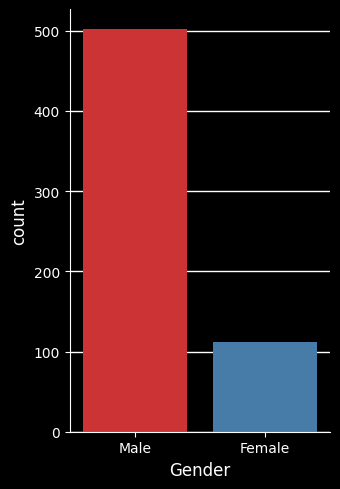

In [34]:
plt.figure(figsize=(10,9))
sns.catplot(data=data,x='Gender',kind= 'count',palette='Set1',aspect=0.7)
plt.style.use("seaborn-notebook")

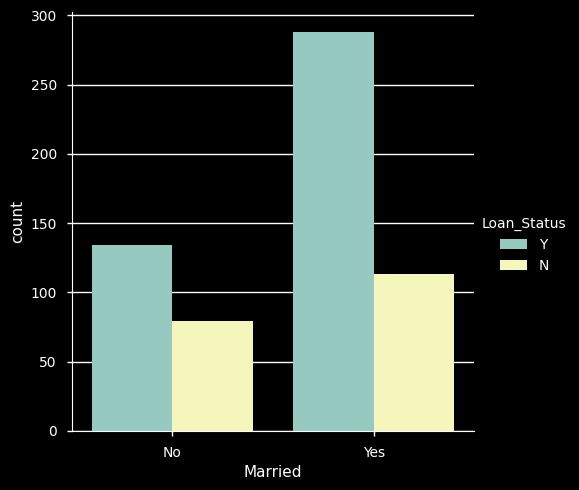

In [35]:
sns.catplot(data=data,x='Married',hue='Loan_Status',height=5,kind='count')
plt.style.use("seaborn-notebook")

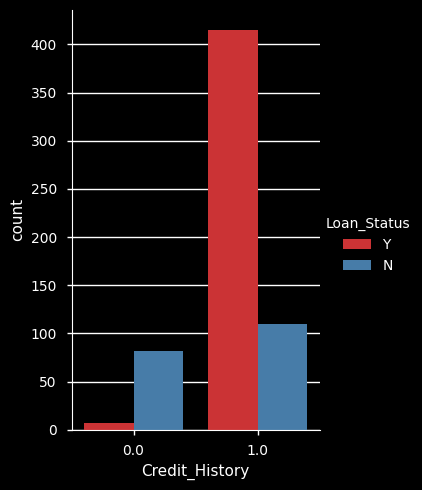

In [36]:
sns.catplot(data=data,x='Credit_History',hue="Loan_Status", kind= 'count',palette='Set1',aspect=0.7)
plt.style.use("seaborn-notebook")

## To Showing a Correlation on dataset

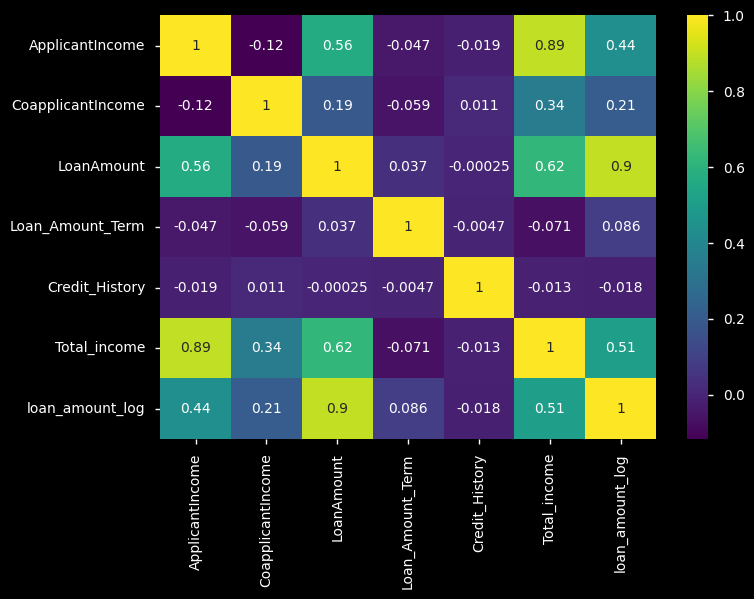

In [37]:
correlations = data.corr()
plt.style.use("dark_background")
sns.heatmap(correlations, annot=True, cmap="viridis")
plt.show()

## **6. Prepare data for Machine Learning Modeling**

### 6.1 Treating Outliers

In [38]:
data_no = data.select_dtypes(exclude=["object"])
data_no.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       120.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Total_income  loan_amount_log  
0             1.0        5849.0         2.079181  
1             1.0        6091.0         2.107210  
2             1.0        3000.0         1.819544  
3             1.0        4941.0         2.079181  
4             1.0        6000.0         2.149219

In [39]:
for i in data_no.columns:
    fig = px.box(data[i], template="plotly_dark")
    fig.update_layout(title=f"<b>{i}</b>", title_x=0.5)
    fig.show()

In [40]:
data.shape

(614, 15)

In [41]:
outlier_veriables = ["ApplicantIncome",'CoapplicantIncome','CoapplicantIncome']

In [42]:
def outlier_remove(data,outlier_veriables):
    """
    This function removes outliers from the dataset and returns new DataFrame.

    Args:
        data (DataFrame): Takes the DataFrame from which you want to remove outliers.
        outlier_veriables (list): Takes the list of variables from which you want to remove outliers.

    Returns:
        DataFrame: Returns the new DataFrame without outliers.
    """
    
    import pandas as pd

    df = pd.DataFrame()
    
    for i in outlier_veriables:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)

        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR

        df_ouliers = data[(data[i]<=lower_limit) | (data[i]>=upper_limit)]
        df = df.append(df_ouliers)
        
    df.drop_duplicates(inplace=True)

    df_with_outliers = data.append(df)
    df_without_outliers = df_with_outliers.drop_duplicates(keep=False)
    
    return df_without_outliers

In [43]:
data = outlier_remove(data,outlier_veriables)
data.shape

(548, 15)

### 6.2  To Encoding of Categorical Variables

In [44]:
data.replace({"Married":{'No':0,'Yes':1}},inplace=True)
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
data.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
data.replace({'Property_Area':{'Rural':0,'Semiurban':2,'Urban':1}},inplace=True)
data.replace({"Gender":{'Female':0,'Male':1}},inplace=True)
data.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)


In [45]:
data["Dependents"].value_counts()

0     328
2      91
1      87
3+     42
Name: Dependents, dtype: int64

In [46]:
data.replace(to_replace='3+',value=4,inplace=True)

In [47]:
data["Dependents"].value_counts()

0    328
2     91
1     87
4     42
Name: Dependents, dtype: int64

In [48]:
data.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          1              0   
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       120.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  Total_income  loan_amount_log  
0             1.0              1            1        5849.0         2.079181  
1             1.0              0            0        6091.0         2.107210  
2             1.0              1            1        3000.0         1.819544  
3             1.0              1            1        4941.0         2.079181  
4             1.0              1            1        6000.0         2.149219

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            548 non-null    object 
 1   Gender             548 non-null    int64  
 2   Married            548 non-null    int64  
 3   Dependents         548 non-null    object 
 4   Education          548 non-null    int64  
 5   Self_Employed      548 non-null    int64  
 6   ApplicantIncome    548 non-null    int64  
 7   CoapplicantIncome  548 non-null    float64
 8   LoanAmount         548 non-null    float64
 9   Loan_Amount_Term   548 non-null    float64
 10  Credit_History     548 non-null    float64
 11  Property_Area      548 non-null    int64  
 12  Loan_Status        548 non-null    int64  
 13  Total_income       548 non-null    float64
 14  loan_amount_log    548 non-null    float64
dtypes: float64(6), int64(7), object(2)
memory usage: 68.5+ KB


### 6.3 Preparing X and y using pandas

In [50]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'loan_amount_log'],
      dtype='object')

In [51]:
features= ['Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','loan_amount_log','Total_income']
target= ['Loan_Status']

In [52]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','loan_amount_log','Total_income']

### 6.4 Scaling Numerical Variables

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data[cols])
data[cols] = scaler.transform(data[cols])

In [54]:
data.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          1              0   
1  LP001003       1        1          1          1              0   
2  LP001005       1        1          0          1              1   
3  LP001006       1        1          0          0              0   
4  LP001008       1        0          0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.902588          -0.933096   -0.198040          0.262394   
1         0.238250           0.101980   -0.042864          0.262394   
2        -0.592435          -0.933096   -1.245476          0.262394   
3        -0.811258           0.685412   -0.198040          0.262394   
4         0.981826          -0.933096    0.209296          0.262394   

   Credit_History  Property_Area  Loan_Status  Total_income  loan_amount_log  
0             1.0              1            1      0.169511         0.000447  
1             1.0              0            0      0.283271         0.151510  
2             1.0              1            1     -1.169759        -1.398893  
3             1.0              1            1     -0.257326         0.000447  
4             1.0              1            1      0.240494         0.377923

In [55]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(548, 15)


## Model Traning

#### 6.5 Splitting X and y into training and test datasets.

In [56]:
X = data[features]
y = data[target]


In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42 )

In [58]:
print('Train cases as below')
print('X_train_shape: ',X_train.shape)
print('y_train_shape: ',y_train.shape)
print('\n Test cases as below')
print('X_test_shape: ',X_test.shape)
print('y_test_shape: ', y_test.shape)

Train cases as below
X_train_shape:  (438, 8)
y_train_shape:  (438, 1)

 Test cases as below
X_test_shape:  (110, 8)
y_test_shape:  (110, 1)


## 7. Model Evalution

### 7.1 Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,roc_auc_score,r2_score

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("recall_score is {}".format(recall_score))
print("roc_auc_score:", roc_auc_score)
print("r2_score:", r2_score)
print("Classification Report:\n", class_report)



Accuracy: 0.8272727272727273
Confusion Matrix:
 [[17 18]
 [ 1 74]]
recall_score is 0.9866666666666667
roc_auc_score: 0.7361904761904763
r2_score: 0.203809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.49      0.64        35
           1       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



## Logistic_Regration_Accuracy

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [60]:
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.8272727272727273


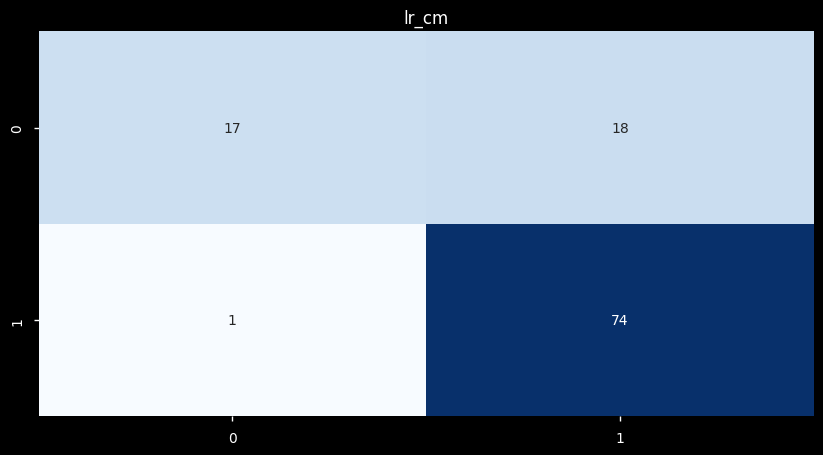

In [61]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

### Train accuracy

In [62]:
# Make predictions on the training set
y_train_pred = logreg.predict(X_train)

# Evaluate the model on the training data

accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
# recall_score = recall_score(y_train, y_train_pred)
# roc_auc_score = roc_auc_score(y_train, y_train_pred)
# r2_score = r2_score(y_test,y_pred)
class_report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
# print("recall_score is {}".format(recall_score))
# print("roc_auc_score:", roc_auc_score)
# print("r2_score:", r2_score)
print("Classification Report:\n", class_report)




Accuracy: 0.817351598173516
Confusion Matrix:
 [[ 57  76]
 [  4 301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.43      0.59       133
           1       0.80      0.99      0.88       305

    accuracy                           0.82       438
   macro avg       0.87      0.71      0.74       438
weighted avg       0.84      0.82      0.79       438



### Get predicted probabilities from the model

In [63]:
y_pred_test = logreg.predict(X_test)

In [64]:
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [65]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

In [66]:
y_pred_probs

array([0.80718598, 0.82315905, 0.81043292, 0.79275247, 0.79380678,
       0.79804968, 0.78369968, 0.74437078, 0.77509736, 0.71475983,
       0.81028527, 0.79315406, 0.79634286, 0.8444913 , 0.09852421,
       0.84837225, 0.75816731, 0.72345809, 0.73056893, 0.14816467,
       0.71897844, 0.71010684, 0.76110613, 0.77740684, 0.77505428,
       0.14419146, 0.75189638, 0.83655171, 0.70684451, 0.83055619,
       0.84379696, 0.77465321, 0.14986095, 0.8491113 , 0.70998133,
       0.78313727, 0.7783211 , 0.81795258, 0.75476268, 0.11598432,
       0.62596862, 0.81153213, 0.74572106, 0.79272372, 0.72969468,
       0.8240013 , 0.11490291, 0.19178839, 0.81003657, 0.80635592,
       0.73077453, 0.8076348 , 0.75799122, 0.73050288, 0.85532339,
       0.10735505, 0.81785286, 0.7513142 , 0.83621787, 0.1152684 ,
       0.82220358, 0.81116715, 0.83818786, 0.83304353, 0.85411705,
       0.76015545, 0.77543531, 0.75433485, 0.74887119, 0.77888838,
       0.78945713, 0.83224285, 0.81024069, 0.76746609, 0.83709

###   Adjust the threshold (e.g., setting it to 0.6)

In [67]:
adjusted_threshold = 0.6
y_pred_adjusted = (y_pred_probs >= adjusted_threshold).astype(int)

In [68]:
y_pred_adjusted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [69]:
X_test_data = X_test.copy()

In [70]:
X_test_data.head()

Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
277          0              0        -0.538386          -0.040789   -0.973919   
84           1              0        -0.073979          -0.933096   -1.555827   
275          1              0        -0.723624           0.331235   -0.295025   
392          0              0        -0.811258           0.518619   -0.198040   
537          2              0        -0.268662          -0.933096   -0.450201   

     Credit_History  loan_amount_log  Total_income  
277             1.0        -0.948613     -0.510231  
84              1.0        -2.048737     -0.705316  
275             1.0        -0.099171     -0.421385  
392             1.0         0.000447     -0.371556  
537             1.0        -0.267941     -0.879717

In [71]:
X_test_data['y_pred_probs'] = y_pred_probs

In [72]:
X_test_data.head()

Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
277          0              0        -0.538386          -0.040789   -0.973919   
84           1              0        -0.073979          -0.933096   -1.555827   
275          1              0        -0.723624           0.331235   -0.295025   
392          0              0        -0.811258           0.518619   -0.198040   
537          2              0        -0.268662          -0.933096   -0.450201   

     Credit_History  loan_amount_log  Total_income  y_pred_probs  
277             1.0        -0.948613     -0.510231      0.807186  
84              1.0        -2.048737     -0.705316      0.823159  
275             1.0        -0.099171     -0.421385      0.810433  
392             1.0         0.000447     -0.371556      0.792752  
537             1.0        -0.267941     -0.879717      0.793807

In [73]:
X_test_data['Loan_approve'] = 0

In [74]:
X_test_data.loc[X_test_data['y_pred_probs']>0.6, 'Loan_approve']=1

In [75]:
X_test_data.head()

Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
277          0              0        -0.538386          -0.040789   -0.973919   
84           1              0        -0.073979          -0.933096   -1.555827   
275          1              0        -0.723624           0.331235   -0.295025   
392          0              0        -0.811258           0.518619   -0.198040   
537          2              0        -0.268662          -0.933096   -0.450201   

     Credit_History  loan_amount_log  Total_income  y_pred_probs  Loan_approve  
277             1.0        -0.948613     -0.510231      0.807186             1  
84              1.0        -2.048737     -0.705316      0.823159             1  
275             1.0        -0.099171     -0.421385      0.810433             1  
392             1.0         0.000447     -0.371556      0.792752             1  
537             1.0        -0.267941     -0.879717      0.793807             1

### 7.2 SVM(Support Vector Machine)

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,roc_auc_score,r2_score


# Initialize and train the SVC
svc= SVC(kernel='linear')
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix_svc = confusion_matrix(y_test, y_pred_test)
recall_score = recall_score(y_test, y_pred_test)
roc_auc_score = roc_auc_score(y_test, y_pred_test)
r2_score = r2_score(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix_svc)
print("recall_score is {}".format(recall_score))
print("roc_auc_score:", roc_auc_score)
print("r2_score:", r2_score)
print("Classification Report:\n", class_report)

Accuracy: 0.8272727272727273
Confusion Matrix:
 [[17 18]
 [ 1 74]]
recall_score is 0.9866666666666667
roc_auc_score: 0.7361904761904763
r2_score: 0.203809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.49      0.64        35
           1       0.80      0.99      0.89        75

    accuracy                           0.83       110
   macro avg       0.87      0.74      0.76       110
weighted avg       0.85      0.83      0.81       110



In [77]:
C_matrix = pd.DataFrame(conf_matrix_svc)
C_matrix.index=['Actual Loan Not Pass','Actual Loan Pass']
C_matrix.columns = ['Predicted Loan Not Pass','Predicted Loan Pass']

C_matrix.style.background_gradient(axis=None, low=0.75, high=1.0)
  


## Training  Dataset Accuracy

In [78]:
# Make predictions on the training set
y_train_pred = svc.predict(X_train)

# Evaluate the model on the training data

accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix_svc = confusion_matrix(y_train, y_train_pred)
# recall_score = recall_score(y_train, y_train_pred)
# roc_auc_score = roc_auc_score(y_train, y_train_pred)
# r2_score = r2_score(y_test,y_pred)
class_report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix_svc)
print("recall_score is {}".format(recall_score))
print("roc_auc_score:", roc_auc_score)
print("r2_score:", r2_score)
print("Classification Report:\n", class_report)


Accuracy: 0.817351598173516
Confusion Matrix:
 [[ 57  76]
 [  4 301]]
recall_score is 0.9866666666666667
roc_auc_score: 0.7361904761904763
r2_score: 0.203809523809524
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.43      0.59       133
           1       0.80      0.99      0.88       305

    accuracy                           0.82       438
   macro avg       0.87      0.71      0.74       438
weighted avg       0.84      0.82      0.79       438



In [79]:
C_matrix = pd.DataFrame(conf_matrix_svc)

C_matrix.index=['Actual Loan Not Pass','Actual Loan Pass']
C_matrix.columns = ['Predicted Loan Not Pass','Predicted Loan Pass']
print(C_matrix)
display(C_matrix.style.background_gradient(cmap="bwr_r"))

                      Predicted Loan Not Pass  Predicted Loan Pass
Actual Loan Not Pass                       57                   76
Actual Loan Pass                            4                  301


### 7.3 Decision Tree

A decision tree classifier is a tree in which internal nodes are labeled by features. 

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,roc_auc_score,r2_score


# Initialize and train the Decision Tree Classifier
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = dt.predict(X_test)

# Evaluate the model
d_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
recall_score = recall_score(y_test, y_pred_test)
roc_auc_score = roc_auc_score(y_test, y_pred_test)
r2_score = r2_score(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Accuracy:", d_accuracy)
print("Confusion Matrix:\n", conf_matrix_dt)
print("recall_score is {}".format(recall_score))
print("roc_auc_score:", roc_auc_score)
print("r2_score:", r2_score)
print("Classification Report:\n", class_report)

Accuracy: 0.7
Confusion Matrix:
 [[19 16]
 [17 58]]
recall_score is 0.7733333333333333
roc_auc_score: 0.6580952380952382
r2_score: -0.38285714285714256
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.54        35
           1       0.78      0.77      0.78        75

    accuracy                           0.70       110
   macro avg       0.66      0.66      0.66       110
weighted avg       0.70      0.70      0.70       110



In [81]:
C_matrix = pd.DataFrame(conf_matrix_dt)
C_matrix.index=['Actual Loan Not Pass','Actual Loan Pass']
C_matrix.columns = ['Predicted Loan Not Pass','Predicted Loan Pass']

C_matrix.style.background_gradient(axis=None, low=0.75, high=1.0)
  


## Training Data set accuracy

In [82]:
# Make predictions on the training set
y_train_pred = dt.predict(X_train)

# Evaluate the model on the training data

accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix_dt = confusion_matrix(y_train, y_train_pred)
# recall_score = recall_score(y_train, y_train_pred)
# roc_auc_score = roc_auc_score(y_train, y_train_pred)
# r2_score = r2_score(y_test,y_pred)
class_report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix_dt)
# print("recall_score is {}".format(recall_score))
# print("roc_auc_score:", roc_auc_score)
# print("r2_score:", r2_score)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[133   0]
 [  0 305]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       305

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



In [83]:
C_matrix = pd.DataFrame(conf_matrix_dt)

C_matrix.index=['Actual Loan Not Pass','Actual Loan Pass']
C_matrix.columns = ['Predicted Loan Not Pass','Predicted Loan Pass']
print(C_matrix)
display(C_matrix.style.background_gradient(cmap="bwr_r"))

                      Predicted Loan Not Pass  Predicted Loan Pass
Actual Loan Not Pass                      133                    0
Actual Loan Pass                            0                  305


### 7.4 Random Forest 

In [84]:
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Decision Tree Classifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_test)
# recall_score = recall_score(y_test, y_pred_test)
# roc_auc_score = roc_auc_score(y_test, y_pred_test)
# r2_score = r2_score(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix_rfc)
# print("recall_score is {}".format(recall_score))
# print("roc_auc_score:", roc_auc_score)
# print("r2_score:", r2_score)
print("Classification Report:\n", class_report)

Accuracy: 0.8090909090909091
Confusion Matrix:
 [[20 15]
 [ 6 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.57      0.66        35
           1       0.82      0.92      0.87        75

    accuracy                           0.81       110
   macro avg       0.80      0.75      0.76       110
weighted avg       0.80      0.81      0.80       110



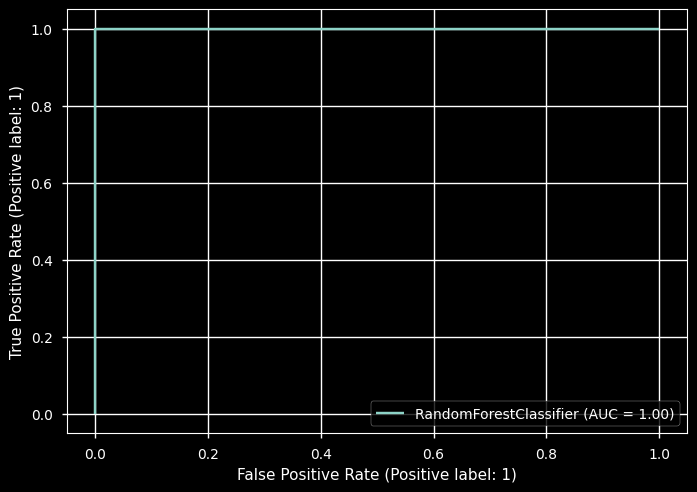

In [85]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(rfc, X_test, y_pred_test) 

In [86]:
C_matrix = pd.DataFrame(conf_matrix_rfc)
C_matrix.index=['Actual Loan Not Pass','Actual Loan Pass']
C_matrix.columns = ['Predicted Loan Not Pass','Predicted Loan Pass']

C_matrix.style.background_gradient(axis=None, low=0.75, high=1.0)
  


In [87]:
# Make predictions on the training set
y_train_pred = rfc.predict(X_train)

# Evaluate the model on the training data

accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix_rfc = confusion_matrix(y_train, y_train_pred)
# recall_score = recall_score(y_train, y_train_pred)
# roc_auc_score = roc_auc_score(y_train, y_train_pred)
# r2_score = r2_score(y_test,y_pred)
class_report = classification_report(y_train, y_train_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix_rfc)
# print("recall_score is {}".format(recall_score))
# print("roc_auc_score:", roc_auc_score)
# print("r2_score:", r2_score)
print("Classification Report:\n", class_report)


Accuracy: 1.0
Confusion Matrix:
 [[133   0]
 [  0 305]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       305

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



In [88]:
C_matrix = pd.DataFrame(conf_matrix_rfc)

C_matrix.index=['Actual Loan Not Pass','Actual Loan Pass']
C_matrix.columns = ['Predicted Loan Not Pass','Predicted Loan Pass']
display(C_matrix.style.background_gradient(cmap="bwr_r"))

In [89]:
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Decision Tree Classifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_test)
 #recall_score = recall_score(y_test, y_pred_test)
# roc_auc_score = roc_auc_score(y_test, y_pred_test)
# r2_score = r2_score(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix_rfc)
# print("recall_score is {}".format(recall_score))
# print("roc_auc_score:", roc_auc_score)
# print("r2_score:", r2_score)
print("Classification Report:\n", class_report)

Accuracy: 0.8
Confusion Matrix:
 [[20 15]
 [ 7 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.57      0.65        35
           1       0.82      0.91      0.86        75

    accuracy                           0.80       110
   macro avg       0.78      0.74      0.75       110
weighted avg       0.79      0.80      0.79       110



## 8.Show Model Accuracy

#### Models comparision The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In this notebbok 4 different algorithms are compared


Text(0.5, 1.0, 'Model Accuracy')

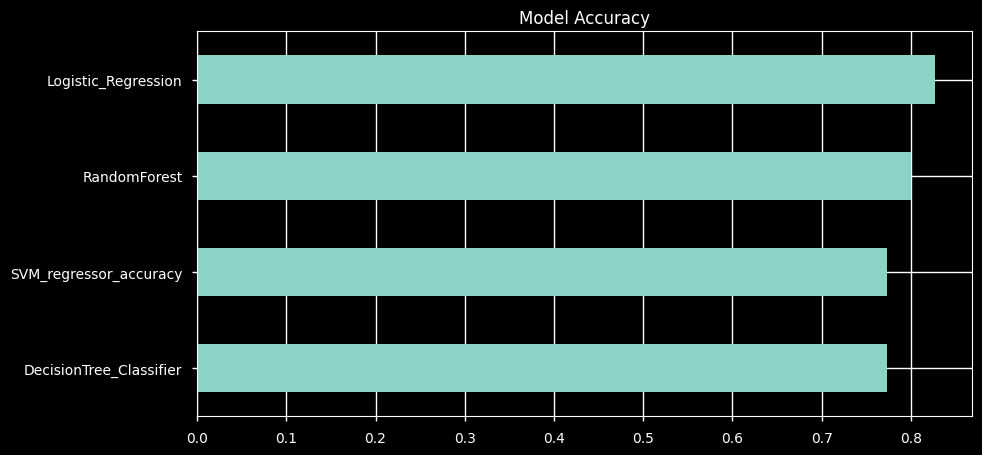

In [90]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,recall_score,recall_score,accuracy], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(10,5))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

# 9.Summary

#### In this notebook we use pandas, numpy, pandas profiling for data preprocessiong and for visualization we use matplotlib, seaborn and mostly plotly. By working on the LOAN_PREDICTON data we conclude that the Loan_Amount [Approve OR Not_Approve] 

#### Here we use different machine learning model to predict the app ratings and also compare the model performence.

SVM_regressor_accuracy: 0.7733333333333333


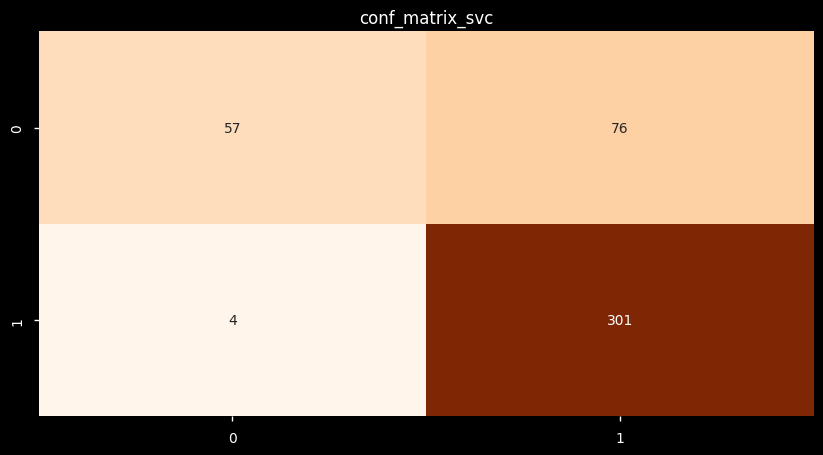

In [91]:
plt.figure(figsize=(10,5))
plt.title("conf_matrix_svc")
sns.heatmap(conf_matrix_svc,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',recall_score)

## **10. Save the Model**

In [92]:

X = data[features]
y = data[target]
X

Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0            0              0         0.902588          -0.933096   -0.198040   
1            1              0         0.238250           0.101980   -0.042864   
2            0              1        -0.592435          -0.933096   -1.245476   
3            0              0        -0.811258           0.685412   -0.198040   
4            0              0         0.981826          -0.933096    0.209296   
..         ...            ...              ...                ...         ...   
609          0              0        -0.644911          -0.933096   -1.148491   
610          4              0        -0.012058          -0.933096   -1.749797   
611          1              0         2.069115          -0.768362    2.381756   
612          2              0         1.812511          -0.933096    1.101556   
613          0              1         0.238250          -0.933096    0.054120   

     Credit_History  loan_amount_log  Total_income  
0               1.0         0.000447      0.169511  
1               1.0         0.151510      0.283271  
2               1.0        -1.398893     -1.169759  
3               1.0         0.000447     -0.257326  
4               1.0         0.377923      0.240494  
..              ...              ...           ...  
609             1.0        -1.227965     -1.216767  
610             1.0        -2.571043     -0.649846  
611             1.0         1.746348      1.327328  
612             1.0         1.038808      0.984637  
613             0.0         0.241202     -0.425616  

[548 rows x 8 columns]

In [93]:
rf =RandomForestClassifier(min_samples_split= 100,
n_estimators= 870,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 7,
 criterion= 'gini')

In [94]:
rf.fit(X,y)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=100,
                       n_estimators=870)

In [95]:
import joblib

In [96]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [97]:
model = joblib.load('loan_status_predict')

In [98]:
import pandas as pd
df = pd.DataFrame({
    'Dependents':2,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
  
},index=[0])

In [99]:
import pandas as pd

data = {
    'Dependents': [0],
    'Self_Employed': [1],
    'ApplicantIncome':[2889],
    'CoapplicantIncome':[0.0],
    'LoanAmount':[54],
    'Credit_History':[0],
    'loan_amount_log':[1.90],
    'Total_income':[5455]
}

df = pd.DataFrame(data)

result = model.predict(df)
print(result)


[0]


In [100]:
df

Dependents  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0              1             2889                0.0          54   

   Credit_History  loan_amount_log  Total_income  
0               0              1.9          5455

In [101]:
result = model.predict(df)

In [102]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


## Application-based Machine Learning Model

We're creating an application based on this machine learning model. You can input any values into the application, click the button, and within seconds, you'll receive the loan status determined by the best machine learning model, boasting an accuracy of 82.49%.

In [103]:
from tkinter import *
import joblib
import pandas as pd

In [ ]:
def show_entry():
    
 
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())

    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({

    'Dependents':p1,
    'Self_Employed':p2,
    'ApplicantIncome':p3,
    'CoapplicantIncome':p4,
    'LoanAmount':p5,
    'Loan_Amount_Term':p6,
    'Credit_History':p7,
  
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)


Label(master,text = "Dependents [1,2,3,4]").grid(row=1)
Label(master,text = "Self_Employed").grid(row=2)
Label(master,text = "ApplicantIncome").grid(row=3)
Label(master,text = "CoapplicantIncome").grid(row=4)
Label(master,text = "LoanAmount").grid(row=5)
Label(master,text = "Loan_Amount_Term").grid(row=6)
Label(master,text = "Credit_History").grid(row=7)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)




e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)


Button(master,text="Predict",command=show_entry).grid()

mainloop()

# THANK YOU